# 1. Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
import numpy as np
from numpy import mean
from numpy import absolute
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from prophet import Prophet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 2. Splitting the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
JFK=pd.read_csv("/content/drive/MyDrive/Weather_Forecasting/JFK_30_Corrected.csv",index_col="DATE")
weather_y=JFK.pop("TMAX")
weather_x=JFK

In [4]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.25,shuffle=False)

In [5]:
print("train_X shape:", train_X.shape)
print("test_X shape:", test_X.shape)
print("train_y shape:", train_y.shape)
print("test_y shape:", test_y.shape)

train_X shape: (8217, 5)
test_X shape: (2740, 5)
train_y shape: (8217,)
test_y shape: (2740,)


In [6]:
kf = KFold(n_splits=10)

# 3. Models

# 3.1 Decision Tree

In [7]:
M1_Score = cross_val_score(DecisionTreeRegressor(), train_X, train_y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {M1_Score}')
print(mean(absolute(M1_Score)))

Scores for each fold are: [-40.1667405  -41.49453274 -43.22012929 -39.35185158 -42.4701733
 -40.61709267 -40.80749362 -42.20405696 -35.11557321 -38.85797868]
40.43056225513993


In [8]:
M1_regressor=DecisionTreeRegressor()
M1_regressor.fit(train_X,train_y)

DecisionTreeRegressor()

In [9]:
M1_prediction=M1_regressor.predict(test_X)

In [10]:
MAE_1=mean_absolute_error(test_y,M1_prediction)
print("Mean absolute error: %.2f" % MAE_1)
MSE_1=mean_squared_error(test_y,M1_prediction)
print("Residual sum of squares (MSE): %.2f" % MSE_1)
R2_1=r2_score(test_y,M1_prediction)
print("R2-score: %.2f" % R2_1)

Mean absolute error: 4.80
Residual sum of squares (MSE): 38.31
R2-score: 0.87


# 3.2 Random Forest

In [11]:
M2_Score = cross_val_score(RandomForestRegressor(), train_X, train_y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {M2_Score}')
print(mean(absolute(M2_Score)))

Scores for each fold are: [-29.15779133 -28.48229883 -30.12017753 -26.57023761 -29.56040635
 -28.40413954 -25.97580546 -30.72453371 -23.83119675 -25.81792089]
27.864450800367603


In [12]:
M2_regressor=RandomForestRegressor()
M2_regressor.fit(train_X,train_y)

RandomForestRegressor()

In [13]:
M2_prediction=M2_regressor.predict(test_X)

In [14]:
MAE_2=mean_absolute_error(test_y,M2_prediction)
print("Mean absolute error: %.2f" % MAE_2)
MSE_2=mean_squared_error(test_y,M2_prediction)
print("Residual sum of squares (MSE): %.2f" % MSE_2)
R2_2=r2_score(test_y,M2_prediction)
print("R2-score: %.2f" % R2_2)

Mean absolute error: 4.10
Residual sum of squares (MSE): 26.96
R2-score: 0.91


# 3.3 XGBoost

In [15]:
M3_score = cross_val_score(xgb.XGBRegressor(), train_X, train_y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {M3_score}')
print(mean(absolute(M3_score)))

Scores for each fold are: [-25.1999497  -24.79704344 -26.22912579 -23.03894989 -26.12906791
 -24.74573415 -21.70225169 -26.58417941 -22.56325192 -22.7531289 ]
24.374268280174988


In [16]:
M3_regressor=xgb.XGBRegressor()
M3_regressor.fit(train_X,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
M3_prediction=M3_regressor.predict(test_X)

In [18]:
MAE_3=mean_absolute_error(test_y,M3_prediction)
print("Mean absolute error: %.2f" % MAE_3)
MSE_3=mean_squared_error(test_y,M3_prediction)
print("Residual sum of squares (MSE): %.2f" % MSE_3)
R2_3=r2_score(test_y,M3_prediction)
print("R2-score: %.2f" % R2_3)

Mean absolute error: 3.85
Residual sum of squares (MSE): 23.71
R2-score: 0.92


# 3.4 Prophet

In [19]:
JFK=pd.read_csv("/content/drive/MyDrive/Weather_Forecasting/JFK_30_Corrected.csv")
JFK['DATE']= pd.to_datetime(JFK['DATE'])
df = JFK[["DATE","TMAX"]]

In [20]:
train= df.iloc[:len(df)-2740]
test= df.iloc[len(df)-2740:]

In [21]:
train_prophet = train.rename(columns={'DATE':'ds','TMAX':'y'})
test_prophet = test.rename(columns={'DATE':'ds','TMAX':'y'})

In [22]:
model = Prophet()
model.fit(train_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpywk8e533/74r5nwzq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpywk8e533/86levfgo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19794', 'data', 'file=/tmp/tmpywk8e533/74r5nwzq.json', 'init=/tmp/tmpywk8e533/86levfgo.json', 'output', 'file=/tmp/tmpywk8e533/prophet_model_u5hbcye/prophet_model-20231004203554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:35:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:35:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
proph = model.predict(test_prophet)

In [24]:
M4_prediction=proph[["ds","yhat"]]
M4_prediction=M4_prediction.rename(columns={"ds": "DATE", "yhat": "TMAX"})

In [25]:
test.set_index(["DATE"],inplace=True)
M4_prediction.set_index(["DATE"],inplace=True)

In [26]:
MAE_4=mean_absolute_error(test["TMAX"],M4_prediction)
print("Mean absolute error: %.2f" % MAE_4)
MSE_4=mean_squared_error(test["TMAX"],M4_prediction)
print("Residual sum of squares (MSE): %.2f" % MSE_4)
R2_4=r2_score(test["TMAX"],M4_prediction)
print("R2-score: %.2f" % R2_4)

Mean absolute error: 6.45
Residual sum of squares (MSE): 67.58
R2-score: 0.77


# Model Evaluations

In [27]:
summary = pd.DataFrame({'Type':['Decision Tree', 'Random Forest', 'XGBoost', 'Prophet'],
                   'Mean Absolute Error':[MAE_1, MAE_2, MAE_3, MAE_4],
                   'Mean Squared Error':[MSE_1, MSE_2, MSE_3, MSE_4],
                   'R2-Score':[R2_1, R2_2, R2_3, R2_4]})
summary

,Type,Mean Absolute Error,Mean Squared Error,R2-Score
0,Decision Tree,4.801652,38.309849,0.869891
1,Random Forest,4.102068,26.957484,0.908446
2,XGBoost,3.848097,23.711371,0.919471
3,Prophet,6.454733,67.577098,0.770493


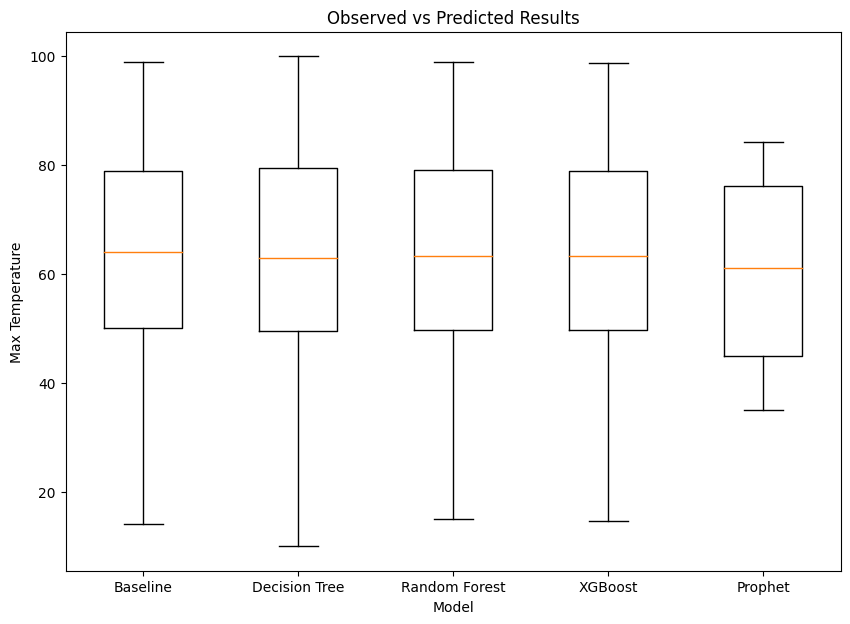

In [28]:
data = [test_y, M1_prediction, M2_prediction, M3_prediction,M4_prediction["TMAX"]]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)
plt.xticks([1, 2, 3, 4, 5], ['Baseline', 'Decision Tree', 'Random Forest','XGBoost', 'Prophet'])
plt.xlabel("Model")
plt.ylabel("Max Temperature")
plt.title("Observed vs Predicted Results")
plt.show()

In [29]:
days=test.reset_index()
days=days['DATE']

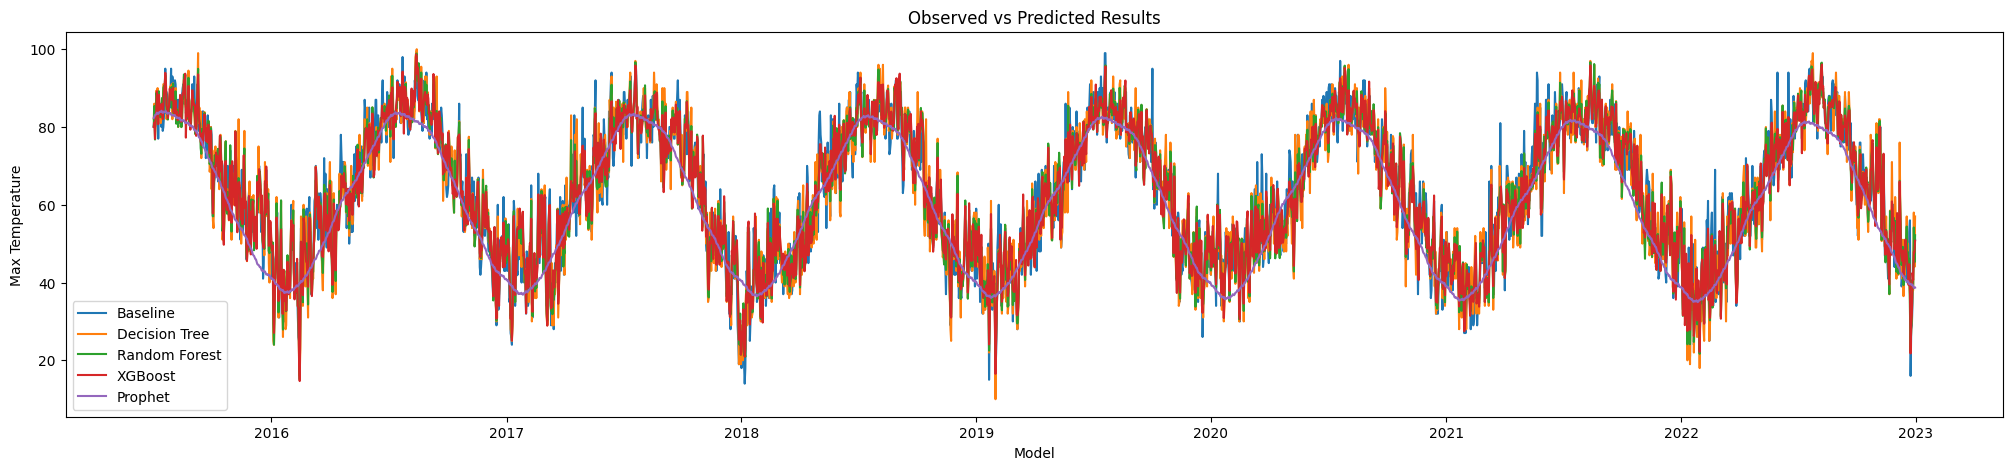

In [30]:
plt.figure(figsize=(25,5))
plt.plot(test,label = "Baseline")
plt.plot(days,M1_prediction,label = "Decision Tree")
plt.plot(days,M2_prediction,label = "Random Forest")
plt.plot(days,M3_prediction,label = "XGBoost")
plt.plot(M4_prediction,label = "Prophet")
plt.xlabel("Model")
plt.ylabel("Max Temperature")
plt.title("Observed vs Predicted Results")
plt.legend()
plt.show()

In [31]:
result=test
result['M1']=M1_prediction
result['M2']=M2_prediction
result['M3']=M3_prediction
result['M4']=M4_prediction
results_M=result.resample('M').mean()

<ipython-input-31-ba06a409b34a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['M1']=M1_prediction
<ipython-input-31-ba06a409b34a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['M2']=M2_prediction
<ipython-input-31-ba06a409b34a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

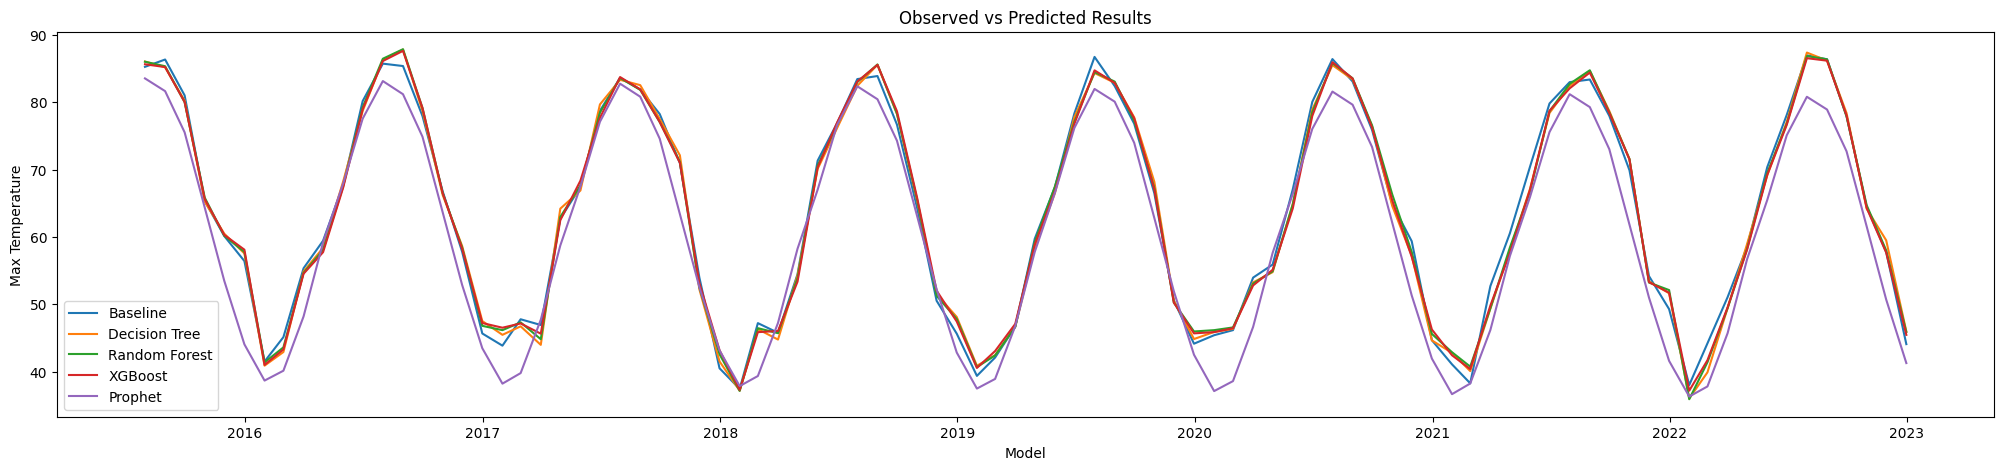

In [32]:
plt.figure(figsize=(25,5))
plt.plot(results_M)
plt.legend(['Baseline', 'Decision Tree','Random Forest','XGBoost','Prophet'])
plt.xlabel("Model")
plt.ylabel("Max Temperature")
plt.title("Observed vs Predicted Results")
plt.show()